## This notebook demonstrates the use of a multi-layer perceptron in order to predict future values.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns; sns.set()

In [20]:
import torch #machine and deep learning library
import torch.nn as nn #use neural networks
import torch.optim as optim #optimization algorithms to help processes run faster
import torch.nn.functional as F
from torch.utils.data import (Dataset, TensorDataset, DataLoader, Subset)

In [21]:
#use the GPU if available for faster computation
if torch.cuda.is_available():
    device="cuda"
else:
    device="cpu"

In [12]:
data=yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-07-27,1435.000000,1547.939941,1413.000000,1539.599976,1539.599976,16048700
2020-07-28,1504.000000,1564.699951,1474.420044,1476.489990,1476.489990,15808700
2020-07-29,1501.000000,1534.810059,1487.000000,1499.109985,1499.109985,9426900


### Plotting our data gives us a much better idea of how the price has changed overtime.

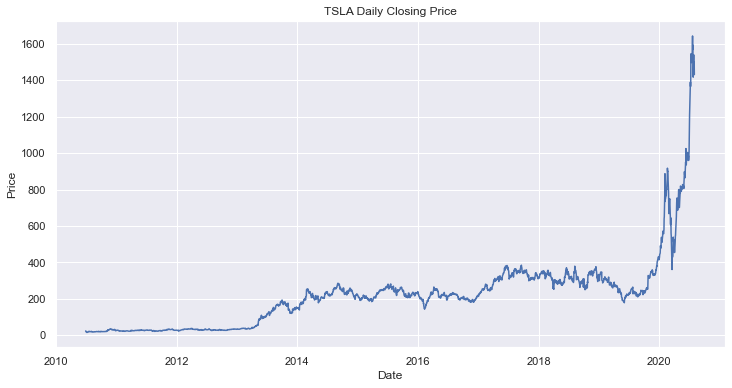

In [19]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Price")
plt.title("TSLA Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()